In [25]:
import sklearn
from sklearn import cluster
import numpy as np
from copy import deepcopy
from sklearn.cluster import KMeans
import spacy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [37]:
#load the text for Rule 3 for analysis 
#text includes definition for companion diagnostic

with open('rule_3_companion.txt', 'r') as f:
    r3 = f.read()
    
sents = [a.strip() for a in r3.split('\n- ')]
sents = sents[1:]
#print(sents)

In [38]:
#spacy toolkit for word encoding 

nlp = spacy.load('en_core_web_sm')

rules = [nlp(sent) for sent in sents]

array = np.array([sent.vector for sent in rules])
array.shape

(13, 96)

In [74]:
kmeansAlgo = sklearn.cluster.KMeans(n_clusters=4) # initalise KMeans

kmeansAlgo.fit(array) # fitting the KMeans algorithm

# Predicting labels with KMeans clustering
labels = kmeansAlgo.predict(array); labels

array([3, 0, 0, 1, 0, 3, 0, 3, 2, 0, 3, 1, 0], dtype=int32)

In [75]:
#defining the cluster centres for the KMeans algorithm 

centers = kmeansAlgo.cluster_centers_
centers.shape

(4, 96)

In [85]:
pd.DataFrame({'sentences': sents, 'cluster number': (labels)})

,sentences,cluster number
0,"for detecting the presence of, or exposure to,...",2
1,for detecting the presence in cerebrospin...,1
2,for detecting the presence of an infecti...,1
3,for pre-natal screening of women in order to ...,0
4,for determining infective disease status ...,1
5,A device which is essential for the safe and e...,0
6,"to be used for disease staging, where t...",1
7,"to be used in screening, diagnosis, or staging...",2
8,for human genetic testing;,3
9,for monitoring of levels of medicinal pr...,1


In [77]:
kmeansAlgo.cluster_centers_.shape

(4, 96)

In [78]:
# performing a principal component analysis to reduce the number of dimensions 

pca = sklearn.decomposition.PCA()
result = pca.fit_transform(array)

In [79]:
projected_centers = pca.transform(centers)
projected_centers[:, :2].shape

(4, 2)

In [80]:
# label names and colours for the plot 
cdict = {0: 'green', 1: 'red', 2: 'orange', 3: 'blue', 4: 'purple', 5: 'turquoise'}
label_names = {0: 'cluster 1', 1: 'cluster 2', 2: 'cluster 3', 3: 'cluster 4', 4: 'cluster 5', 5: 'cluster 6'}

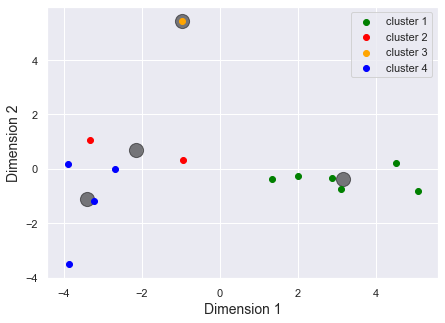

In [81]:
#plot the clusters along with the cluster centres 

fig,ax = plt.subplots(figsize = (7,5))
plt.scatter(projected_centers[:, 0], projected_centers[:, 1], c='black', s=200, alpha=0.5)

for l in np.unique(labels):
    idx = np.where(labels==l)
    ax.scatter(result[idx, 0], result[idx, 1],
              c=cdict[l], label=label_names[l])
    
plt.xlabel("Dimension 1",fontsize=14)
plt.ylabel("Dimension 2",fontsize=14)
plt.legend()
plt.show()

#pca; first component is a weighted linear combination of the 96 dimensions 
#second is also weighted....
#when you project vectors onto this 2D space, you lose information which is why we have an unexpected cluster centre 

#the clusters have been calcualted in 96 dimensions so when you do the pca you don't preserve 

In [82]:
kmeans = KMeans(n_clusters=4)
# Fitting the input data
kmeans = kmeans.fit(array)
# Getting the cluster labels
labels = kmeans.predict(array)
# Centroid values
centroids = kmeans.cluster_centers_